In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [3]:
import plotly.express as px

In [4]:
# For Notebooks
init_notebook_mode(connected=True)

In [5]:
# For offline use
cf.go_offline()

In [6]:
df = pd.read_csv('glassdoor_jobs_cleaned.csv')

In [7]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,in HQ,python_yn,spark_yn,aws_yn,SQL_yn,State,job_simplifier,seniority,desc_len,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,1,0,0,0,NM,data scientist,other,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,1,0,0,0,MD,data scientist,other,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,1,1,1,0,1,FL,data scientist,other,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,1,1,0,0,0,WA,data scientist,other,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,1,0,0,1,NY,data scientist,other,2728,3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  Hourly             742 non-null    int64  
 15  Employer Provided  742 non-null    int64  
 16  Min Salary         742 non

In [9]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))

In [10]:
#Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [11]:
df[df['Hourly']==1][['Min Salary','Max Salary','Average Salary']]

,Min Salary,Max Salary,Average Salary
165,17,24,39.4
177,21,34,52.8
197,18,25,41.3
202,21,34,52.8
210,15,25,38.4
246,17,24,39.4
271,21,34,52.8
337,18,25,41.3
345,24,39,60.5
357,21,34,52.8


- these are some of the values that glassdoor provided as "Hourly" pay. In order to correct this, I have converted these "Hourly" pays into a salary amount and replaced those values into the dataframe. 
- This process is shown below.

In [14]:
df['Average Salary'] = df.apply(lambda x: x['Average Salary']*((40*2*2*12)/1000) if x['Hourly']==1 else x['Average Salary'], axis=1)

In [15]:
df[df['Hourly']==1]['Average Salary']

165    145.24416
177    194.64192
197    152.24832
202    194.64192
210    141.55776
246    145.24416
271    194.64192
337    152.24832
345    223.02720
357    194.64192
363    187.63776
408    176.94720
409     95.47776
492    152.24832
509    223.02720
533    194.64192
542    187.63776
617    176.94720
618     95.47776
645    261.73440
666    152.24832
682    223.02720
711    194.64192
724    187.63776
Name: Average Salary, dtype: float64

In [13]:
df['Average Salary'] = df['Average Salary'].round(1)

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rating,742.0,3.618868,0.801210,-1.0,3.3,3.7,4.0,5.0
Founded,742.0,1837.154987,497.183763,-1.0,1939.0,1988.0,2007.0,2019.0
Hourly,742.0,0.032345,0.177034,0.0,0.0,0.0,0.0,1.0
Employer Provided,742.0,0.022911,0.149721,0.0,0.0,0.0,0.0,1.0
Min Salary,742.0,74.068733,31.869282,10.0,52.0,69.5,91.0,202.0
Max Salary,742.0,127.183288,46.909006,16.0,96.0,124.0,155.0,306.0
Average Salary,742.0,101.370216,37.632125,15.5,73.5,97.5,122.5,254.0
Age,742.0,46.591644,53.778815,-1.0,11.0,24.0,59.0,276.0
in HQ,742.0,0.557951,0.496965,0.0,0.0,1.0,1.0,1.0
python_yn,742.0,0.528302,0.499535,0.0,0.0,1.0,1.0,1.0


In [15]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer Provided', 'Min Salary', 'Max Salary',
       'Average Salary', 'Age', 'Company Text', 'in HQ', 'python_yn',
       'spark_yn', 'aws_yn', 'SQL_yn', 'State', 'job_simplifier', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

In [16]:
df.corr()['Average Salary'].sort_values(ascending = False)

Average Salary       1.000000
Max Salary           0.982595
Min Salary           0.978912
python_yn            0.317513
aws_yn               0.172590
spark_yn             0.171637
Employer Provided    0.093270
num_comp             0.084171
desc_len             0.071191
Age                  0.021813
Rating               0.012606
SQL_yn               0.005113
Founded             -0.010379
in HQ               -0.040335
Hourly              -0.259423
Name: Average Salary, dtype: float64

In [17]:
px.histogram(data_frame=df,x='Rating',nbins=30, title='Rating')

In [18]:
px.histogram(data_frame=df,x='Average Salary',nbins=30, title='Average Salary')

In [19]:
px.histogram(data_frame=df, x='Age',nbins=30, title='Age of Company')

In [20]:
px.histogram(data_frame=df, x='desc_len',nbins=30, title='Description Length')

In [21]:
px.histogram(data_frame=df, x='num_comp',nbins=30,title='Number of Competitors')

In [22]:
px.box(df, y='Average Salary', points='all',title='Box plot of Salary')

In [23]:
px.scatter(df, x="Rating", y="Average Salary", color="Company Text",labels={'Company Text':'Company Name'}, title='Average Salary Based on Ratings')

In [24]:
px.scatter(df, x="Age", y="Average Salary", color="Company Text",labels={'Company Text':'Company Name'}, title='Average Salary Based on Age')

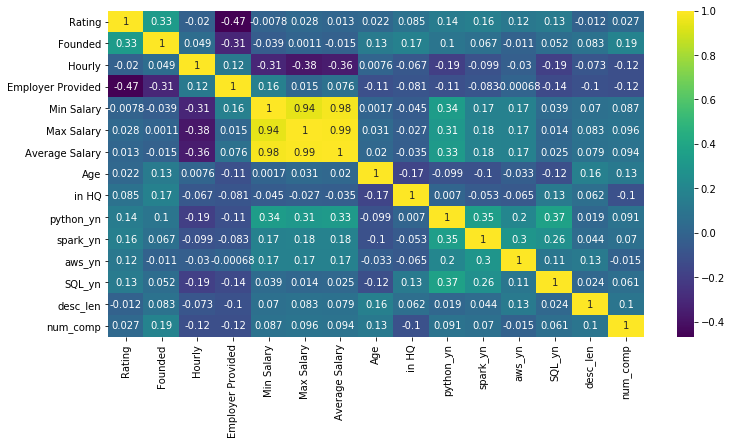

In [60]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='viridis', annot=True)

In [61]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer Provided', 'Min Salary', 'Max Salary',
       'Average Salary', 'Age', 'Company Text', 'in HQ', 'python_yn',
       'spark_yn', 'aws_yn', 'SQL_yn', 'State', 'job_simplifier', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

In [25]:
dff = df[['Rating','Size','Type of ownership','Industry','Sector','Revenue','Location','Average Salary','Age','State',
          'job_simplifier','seniority','num_comp','in HQ','python_yn','spark_yn','aws_yn','SQL_yn']]

In [26]:
len(dff.columns)

18

## Countplots of features

graph for Rating: total = 31


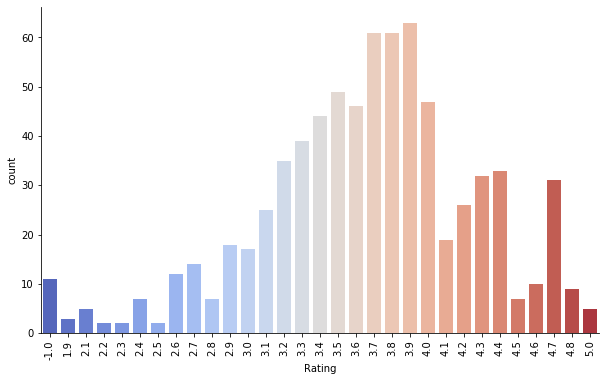

graph for Size: total = 9


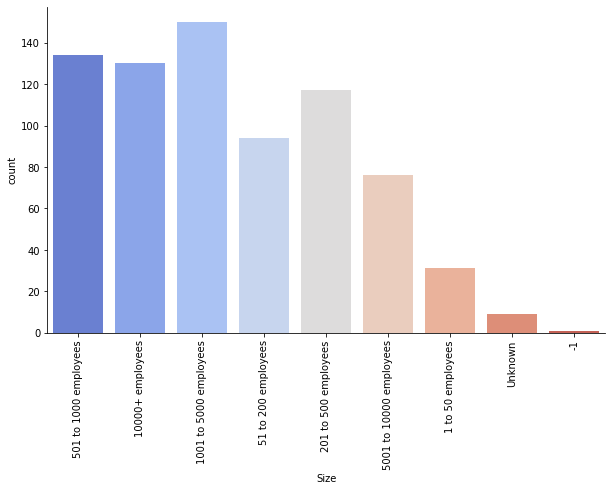

graph for Type of ownership: total = 11


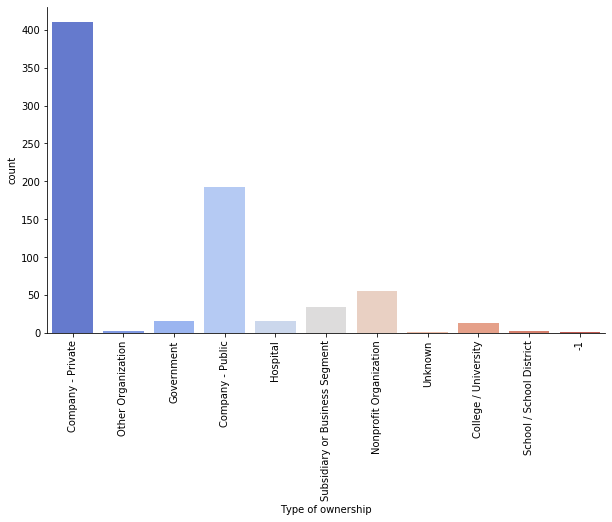

graph for Industry: total = 60


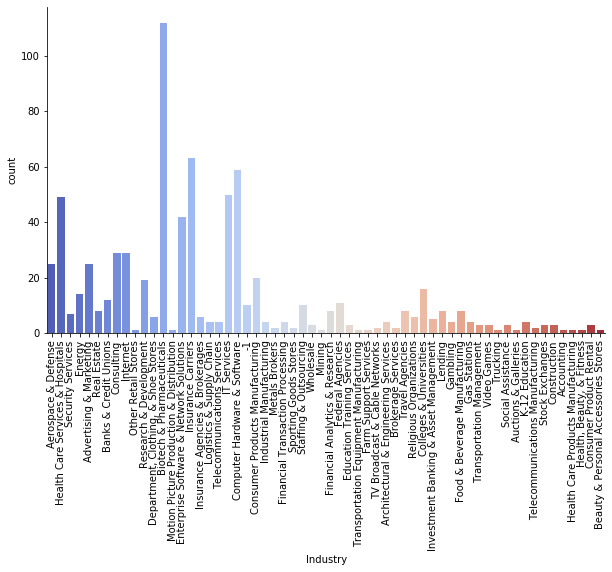

graph for Sector: total = 25


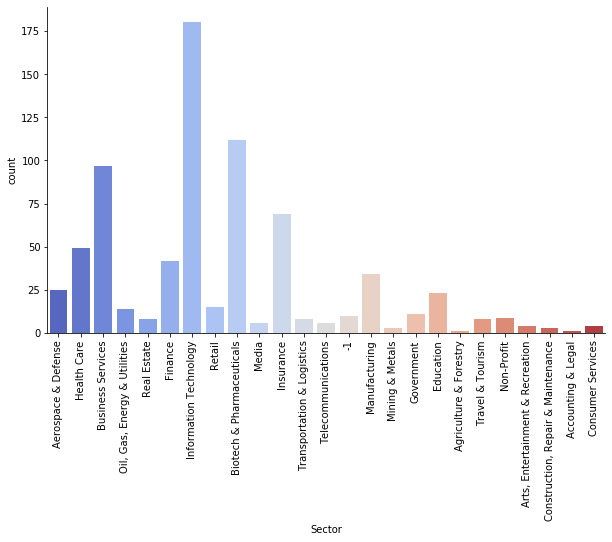

graph for Revenue: total = 14


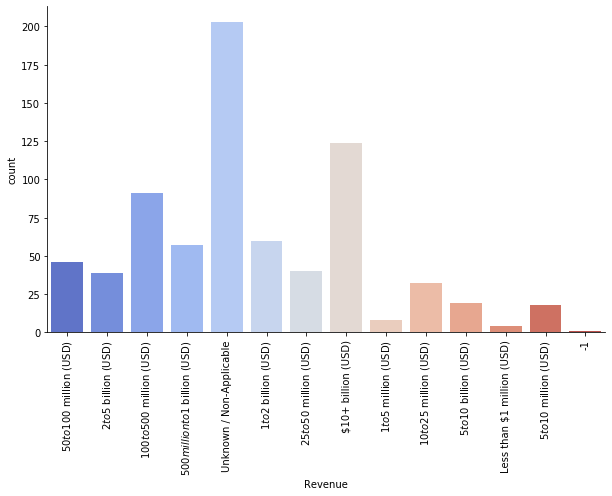

graph for Location: total = 200


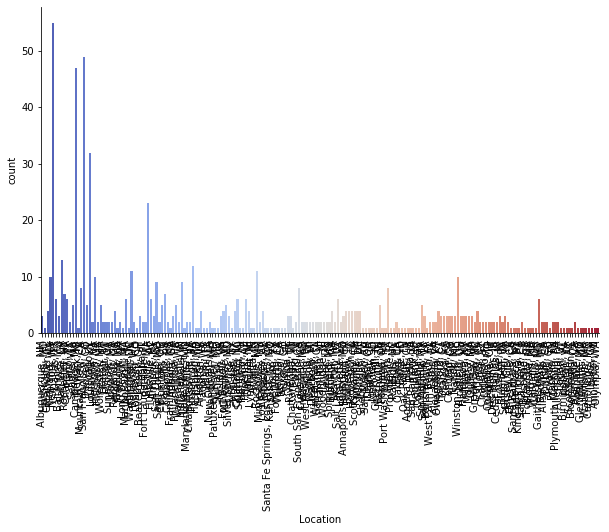

graph for Average Salary: total = 222


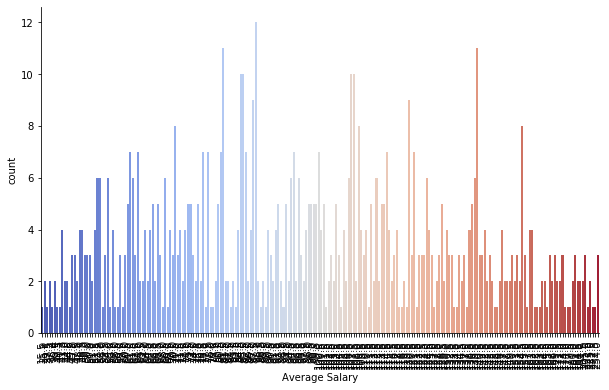

graph for Age: total = 102


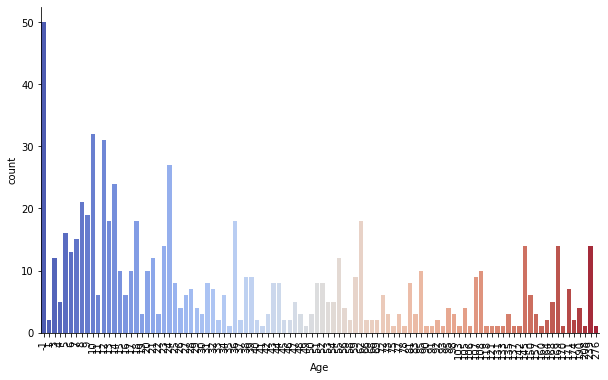

graph for State: total = 37


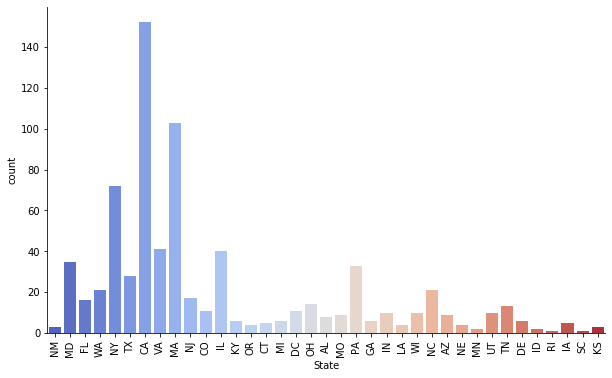

graph for job_simplifier: total = 7


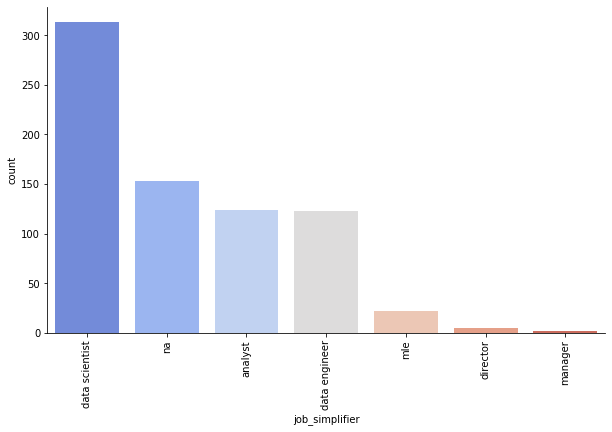

graph for seniority: total = 3


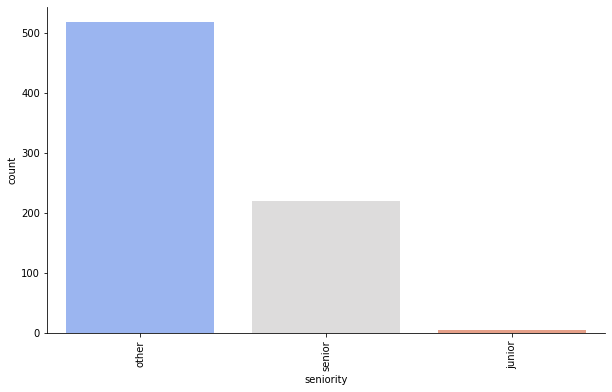

graph for num_comp: total = 5


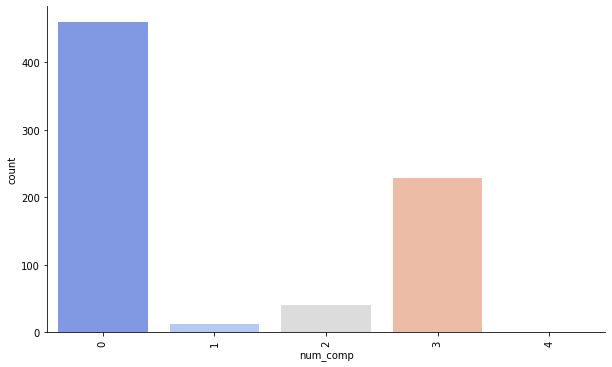

graph for in HQ: total = 2


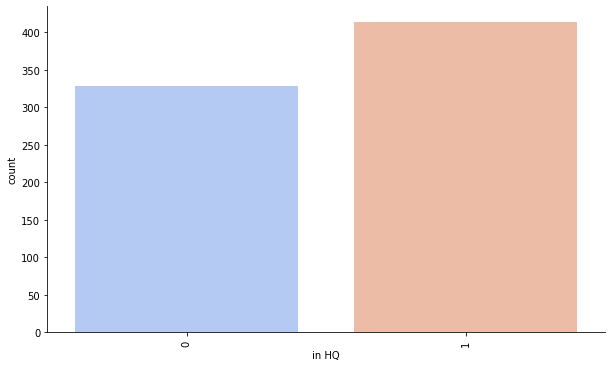

graph for python_yn: total = 2


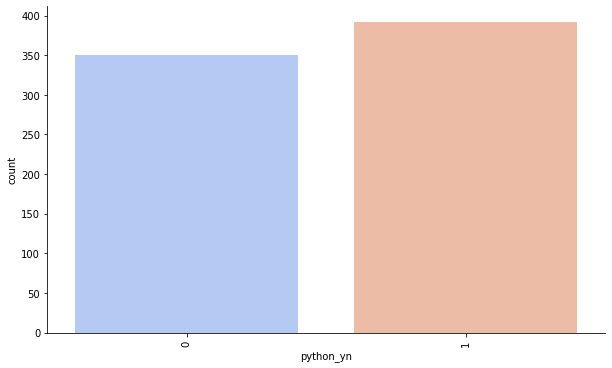

graph for spark_yn: total = 2


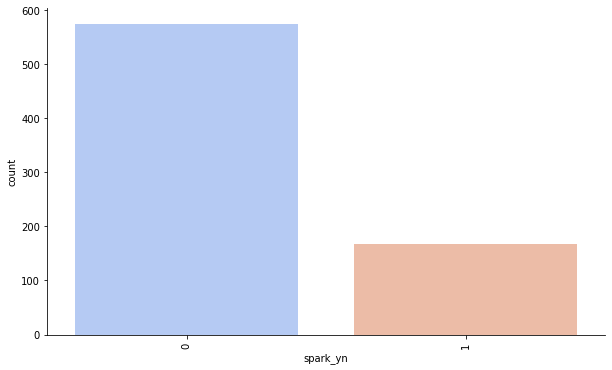

graph for aws_yn: total = 2


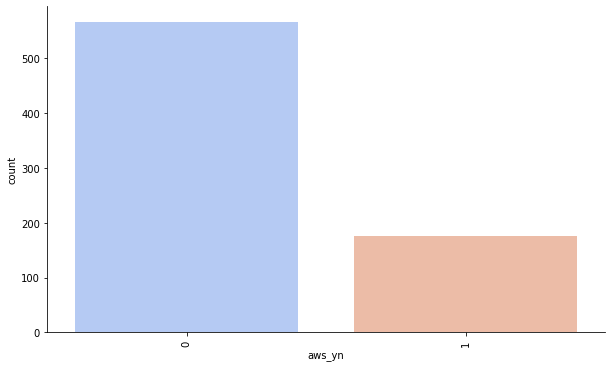

graph for SQL_yn: total = 2


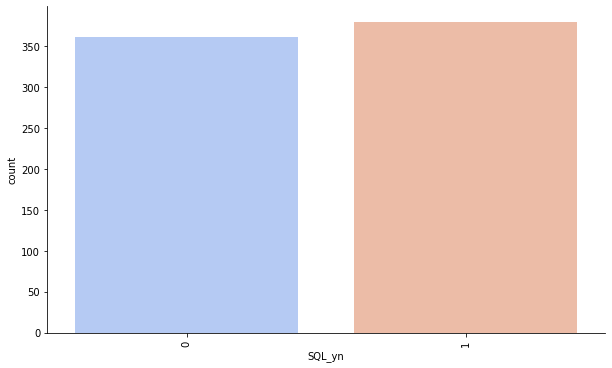

In [23]:
for i in dff.columns:
    plt.figure(figsize=(10,6))
    cat_num = dff[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.countplot(x=i,data=df,palette='coolwarm')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    sns.despine()
    plt.show()

### Top 20 States hiring for these positions

graph for Location: total = 20


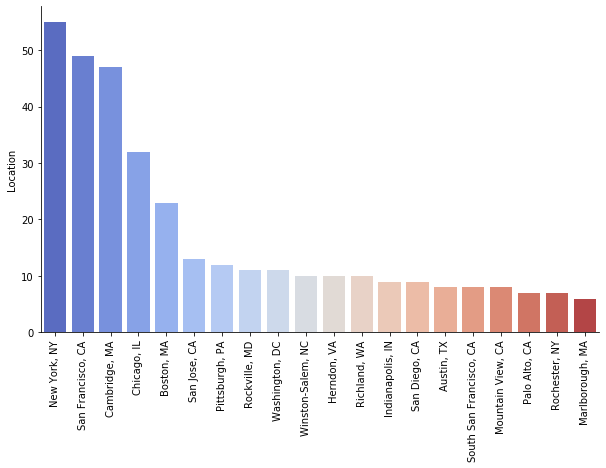

graph for Company Text: total = 20


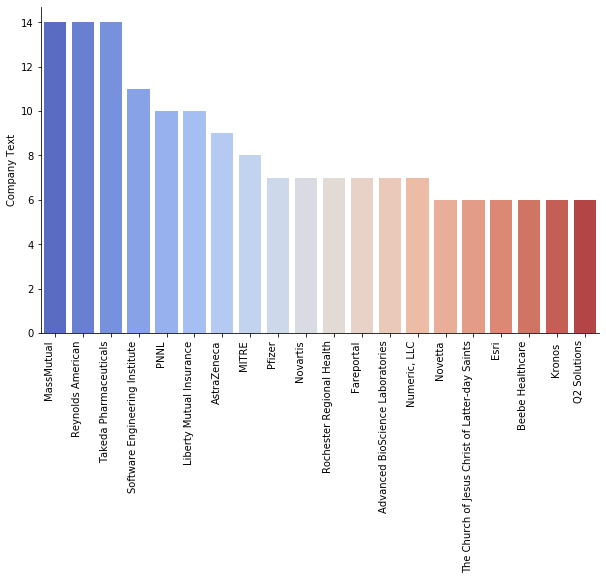

In [30]:
dff=df[['Location','Company Text']]
for i in dff.columns:
    plt.figure(figsize=(10,6))
    cat_num = dff[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index,y=cat_num,palette='coolwarm')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    sns.despine()
    plt.show()

## Average Salary Comparisons

In [30]:
pd.pivot_table(df,index='job_simplifier',values='Average Salary').sort_values(by='Average Salary',ascending = False)

,Average Salary
job_simplifier,
director,130.800000
mle,126.431818
data scientist,118.293930
data engineer,104.650407
na,87.744444
manager,85.250000
analyst,66.837097


In [88]:
pd.pivot_table(df,index='seniority',values='Average Salary')

,Average Salary
seniority,
junior,67.600000
other,93.055899
senior,121.676364


In [91]:
pd.pivot_table(df,index='State',values='Average Salary').sort_values(by = 'Average Salary',ascending = False)

,Average Salary
State,
CA,123.513158
IL,116.662500
DC,110.181818
MA,107.322330
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [34]:
pd.pivot_table(df,index=['job_simplifier','seniority'],values='Average Salary')

Average Salary
job_simplifier seniority                
analyst        junior          53.250000
               other           63.378947
               senior          80.011111
data engineer  other           96.029070
               senior         124.689189
data scientist junior          77.166667
               other          110.645238
               senior         135.590000
director       other          130.800000
manager        other           85.250000
mle            other          119.133333
               senior         142.071429
na             other           76.763462
               senior         111.051020

In [35]:
pd.pivot_table(df,index=['State','job_simplifier'],values='Average Salary')

Average Salary
State job_simplifier                
AL    analyst              60.750000
      data engineer        65.000000
      data scientist       68.000000
      na                   43.750000
AZ    analyst              55.000000
...                              ...
WA    data scientist       99.764706
      na                   97.500000
WI    analyst              58.833333
      data scientist      113.500000
      na                   54.000000

[108 rows x 1 columns]

In [36]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer Provided', 'Min Salary', 'Max Salary',
       'Average Salary', 'Age', 'Company Text', 'in HQ', 'python_yn',
       'spark_yn', 'aws_yn', 'SQL_yn', 'State', 'job_simplifier', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

In [86]:
df2 = df[['Type of ownership','Industry','Sector','Revenue','Age','python_yn','spark_yn',
        'aws_yn','desc_len','num_comp','Average Salary']]

In [92]:
list = []
for i in df2.iloc[:,0:10]:
    list.append(pd.pivot_table(df2,index=i,values='Average Salary').sort_values(by='Average Salary',ascending=False))

In [93]:
list

[                                Average Salary
 Type of ownership                             
 -1                                  117.500000
 Company - Public                    111.022280
 Subsidiary or Business Segment      110.573529
 College / University                107.615385
 Company - Private                   102.038293
 Government                           85.526667
 School / School District             77.750000
 Other Organization                   77.500000
 Nonprofit Organization               72.565455
 Hospital                             65.080000
 Unknown                              39.500000,
                                           Average Salary
 Industry                                                
 Other Retail Stores                           163.500000
 Motion Picture Production & Distribution      146.000000
 Financial Analytics & Research                145.125000
 Health, Beauty, & Fitness                     139.500000
 Telecommunications Service

## Average Salary Comparisons in Plots

In [95]:
df2 = df[['job_simplifier','State','seniority','Type of ownership','Industry','Sector','Revenue','Age','python_yn','spark_yn',
        'aws_yn','desc_len','num_comp','Average Salary']]

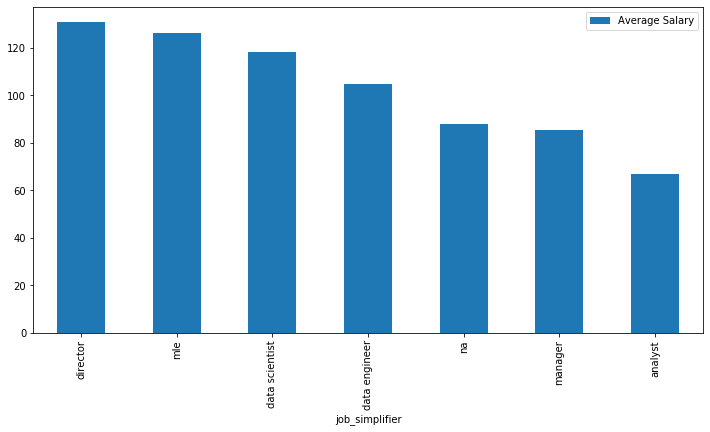

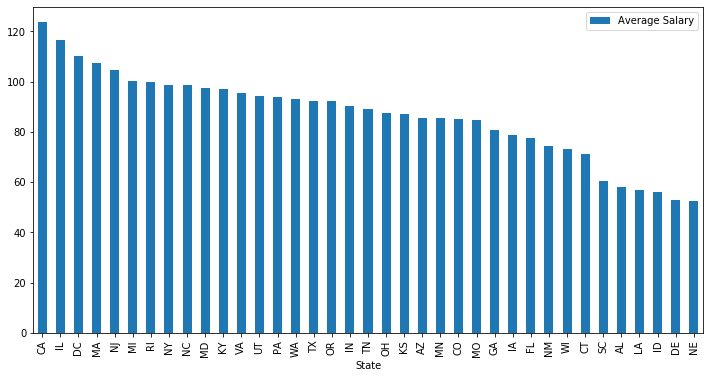

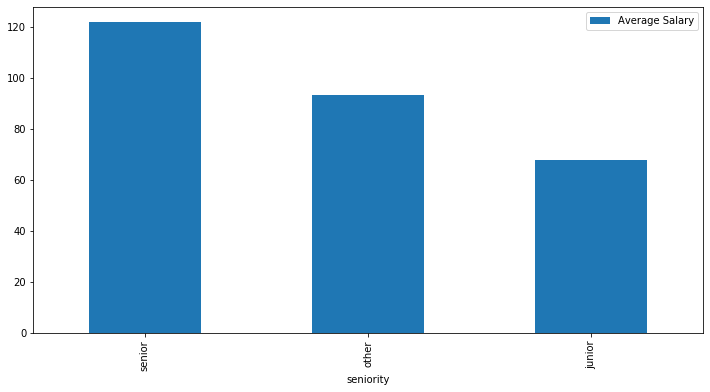

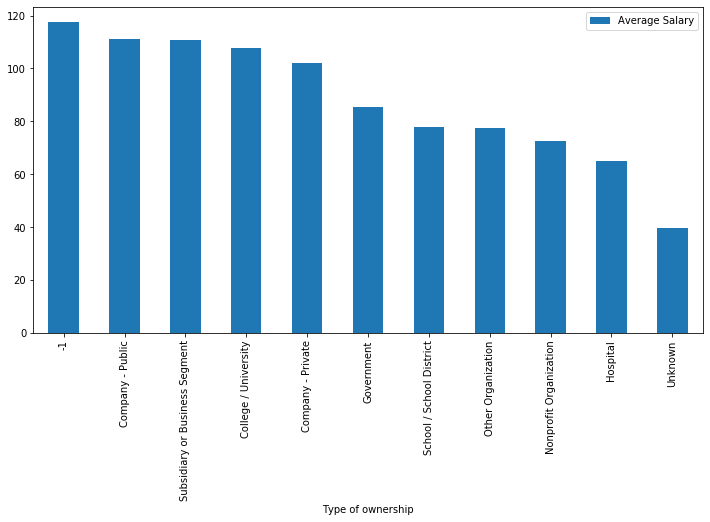

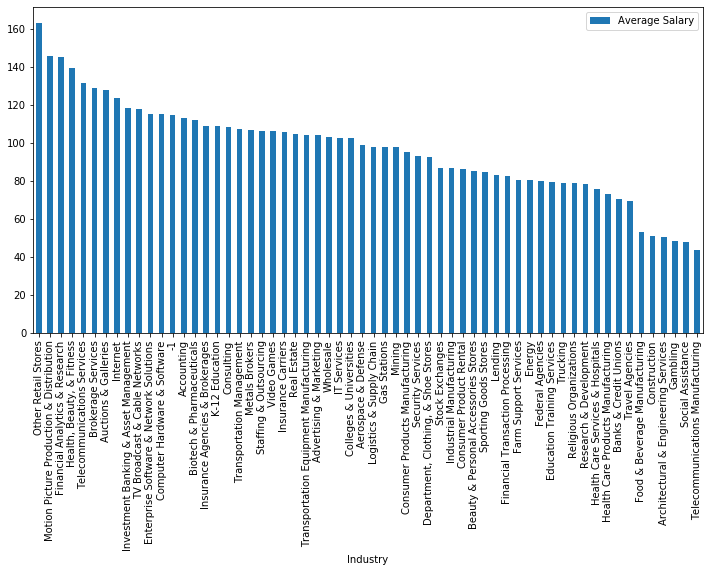

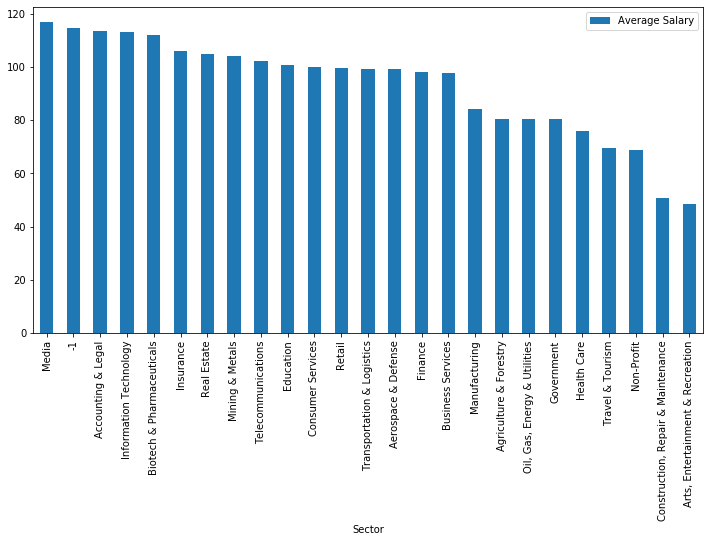

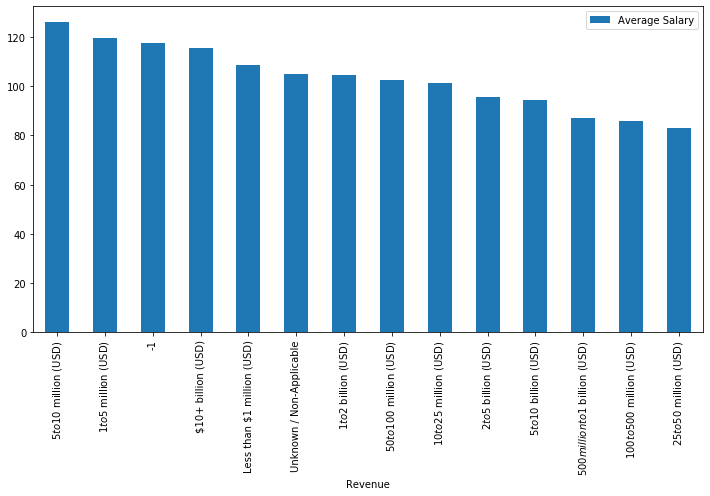

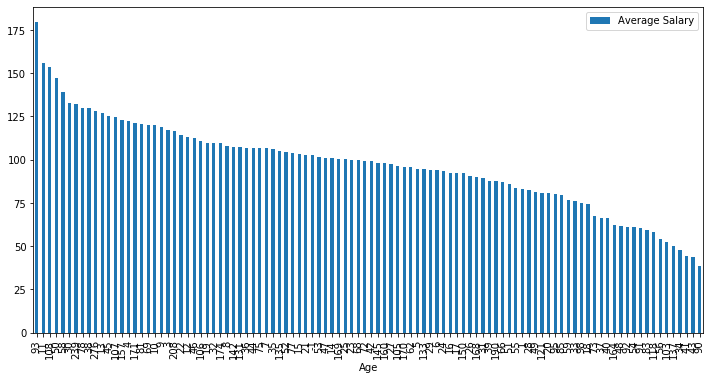

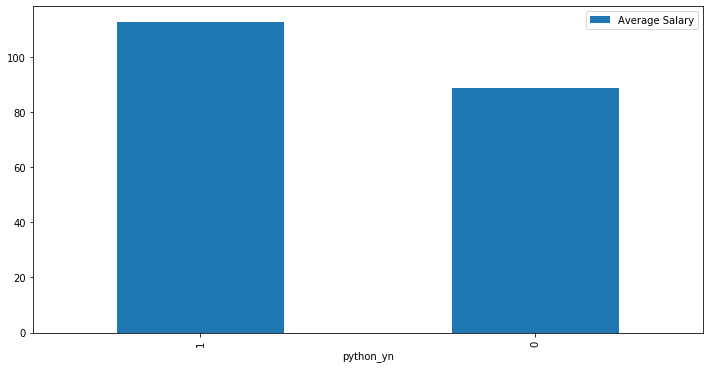

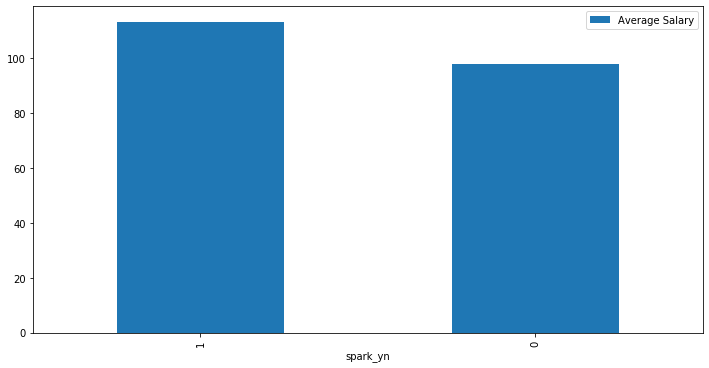

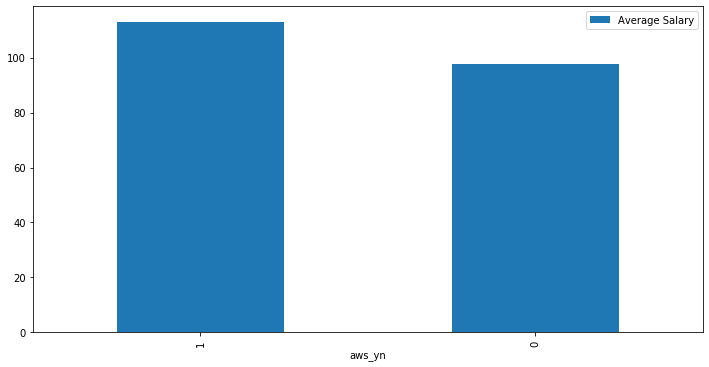

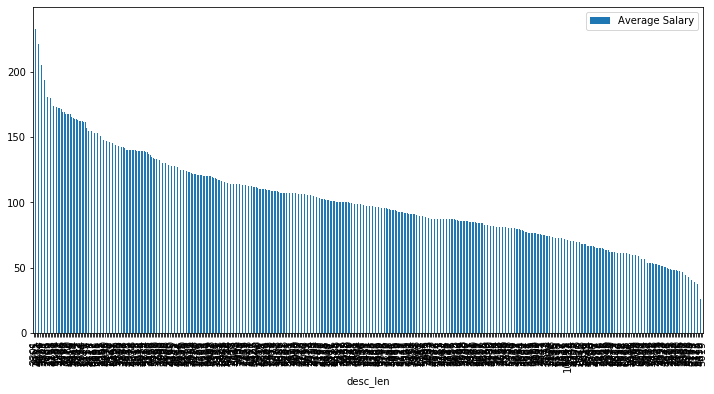

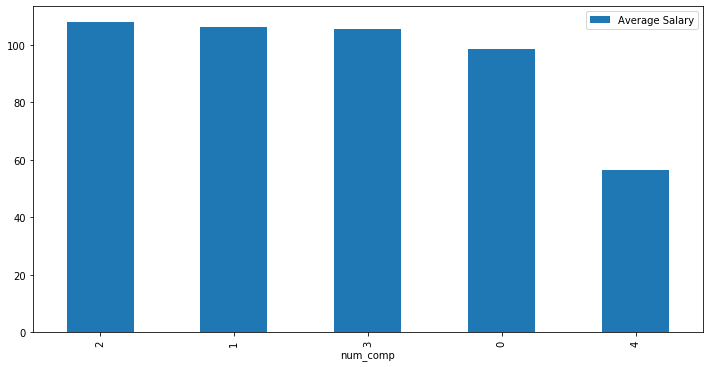

In [97]:
for i in df2.iloc[:,0:13]:
    pd.pivot_table(df2,index=i,values='Average Salary').sort_values(by='Average Salary',ascending=False).plot(kind='bar',figsize=(12,6))
    plt.tight_layout

In [102]:
df.to_csv('glassdoor_jobs_cleaned.csv',index=False)